In [3]:
import tensorflow as tf
import numpy as np
from env import env as Env
from taskexp import Task
from agent_opt import Agent
import threading
import itertools
from multiprocessing import Process

In [7]:
hyper_parameters = [[16],[5], [0.9], [0.1]]
scenarios = list(itertools.product(*hyper_parameters))

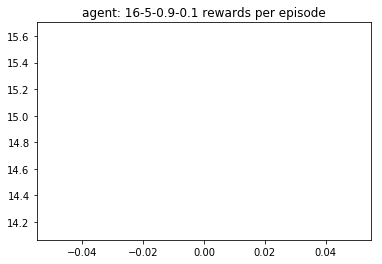

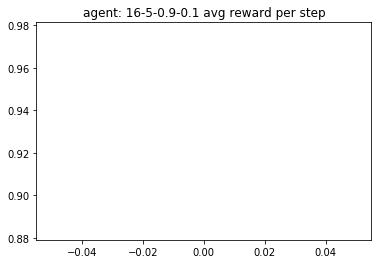

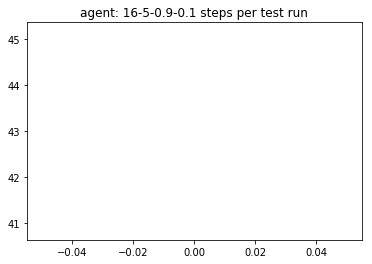

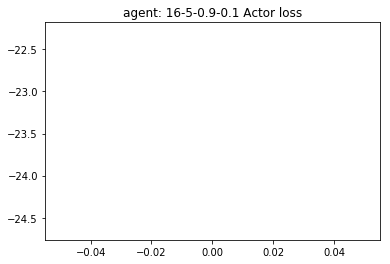

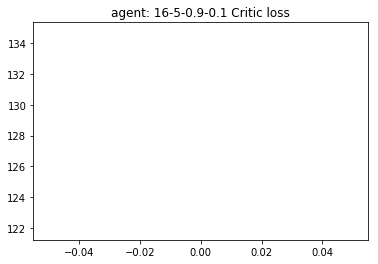

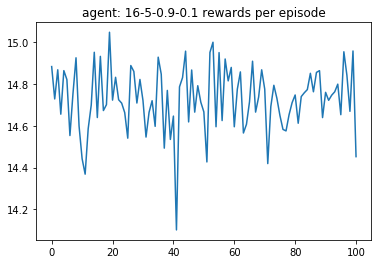

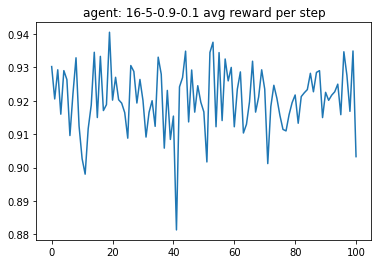

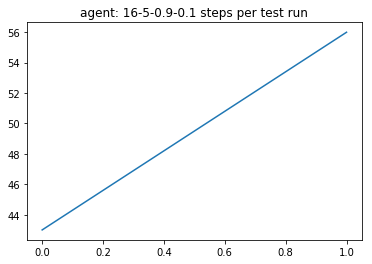

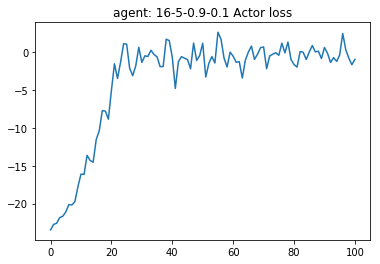

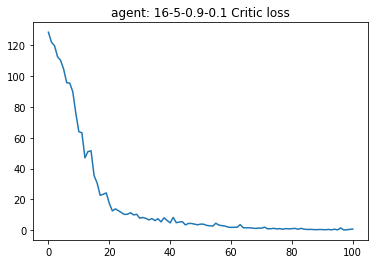

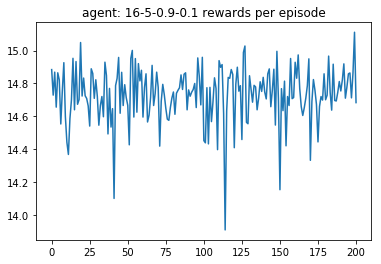

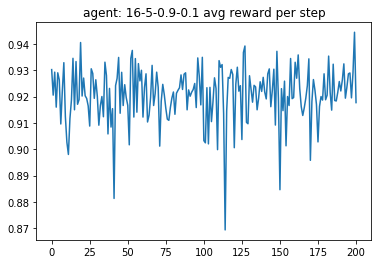

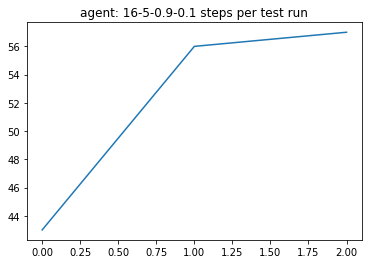

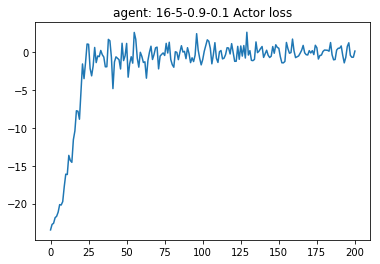

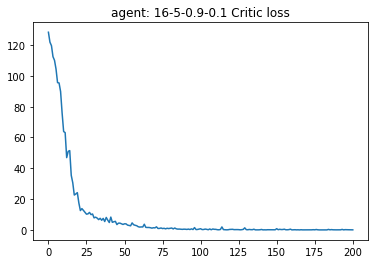

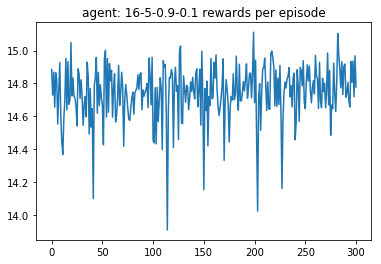

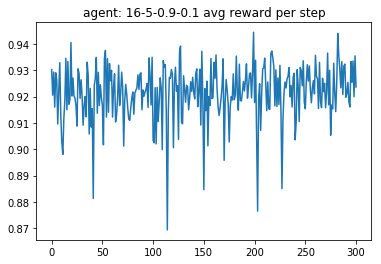

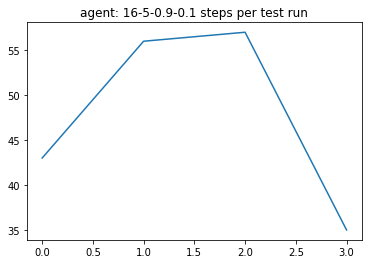

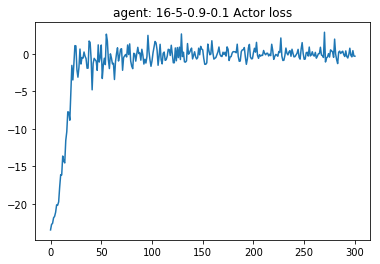

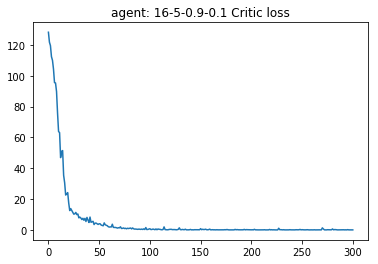

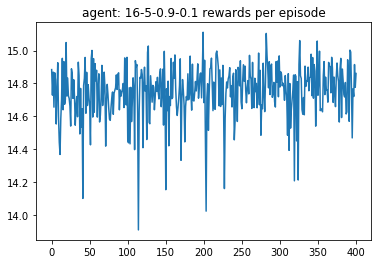

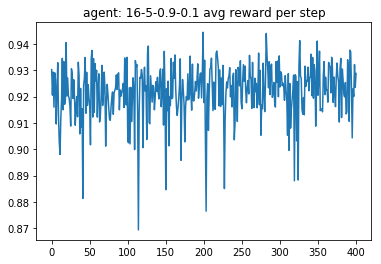

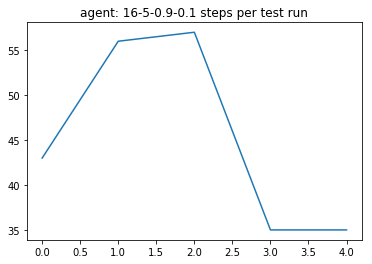

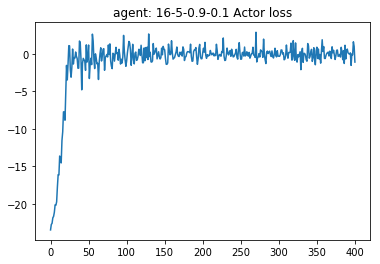

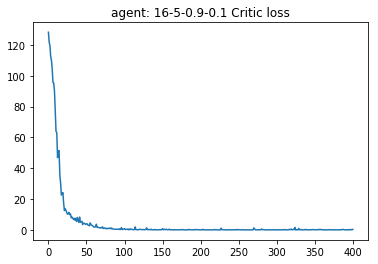

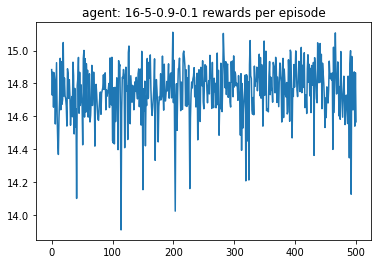

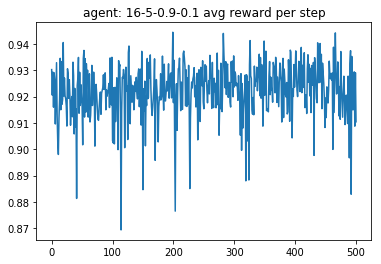

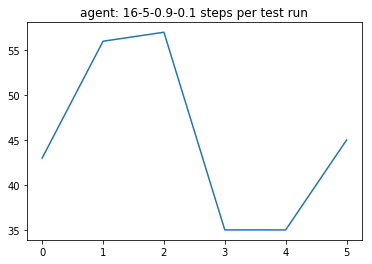

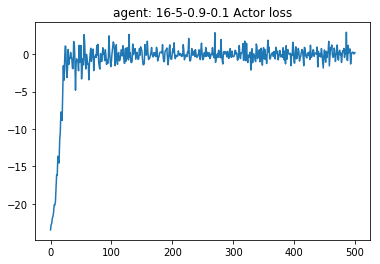

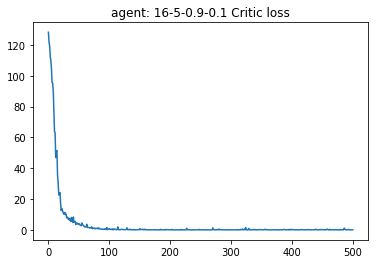

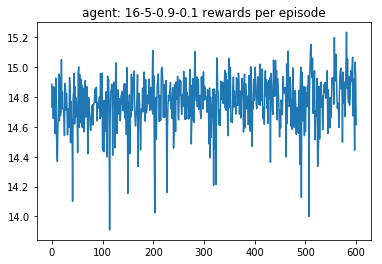

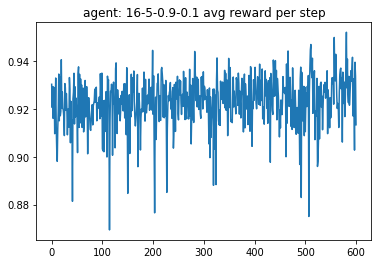

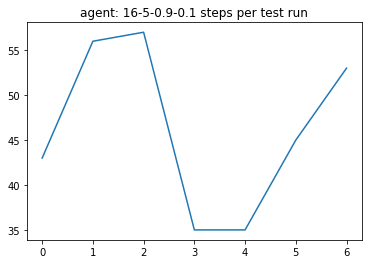

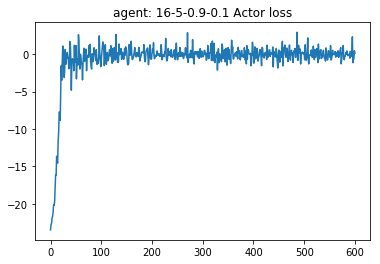

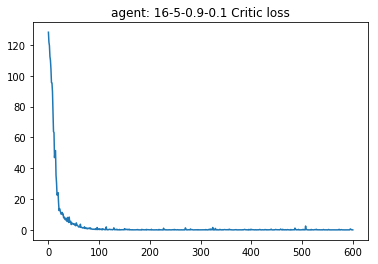

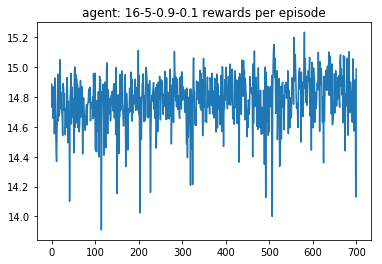

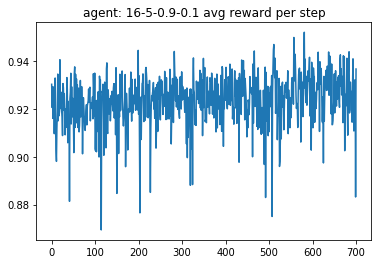

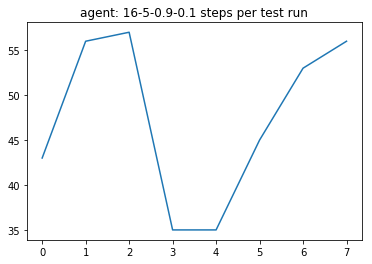

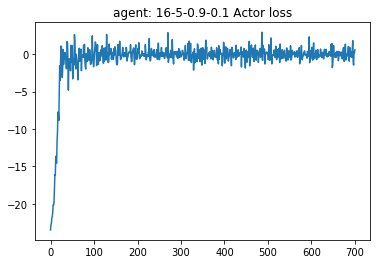

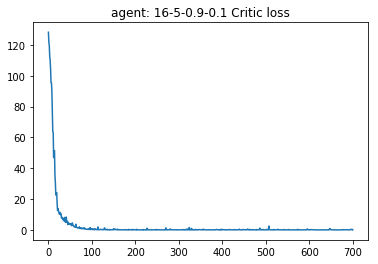

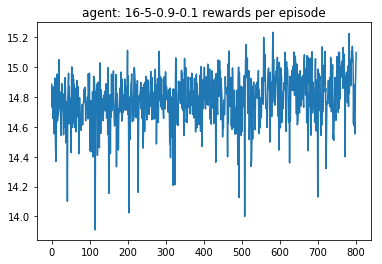

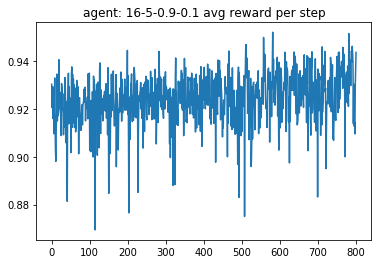

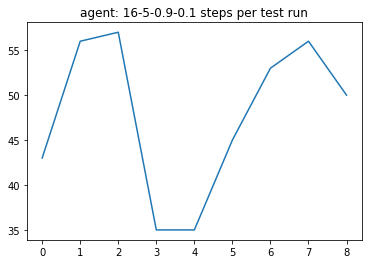

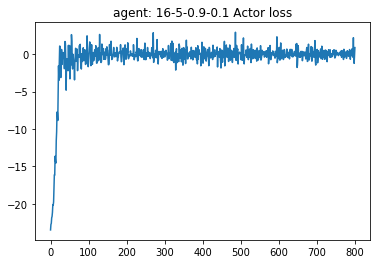

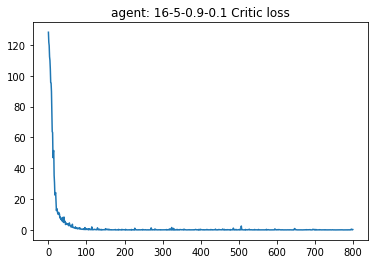

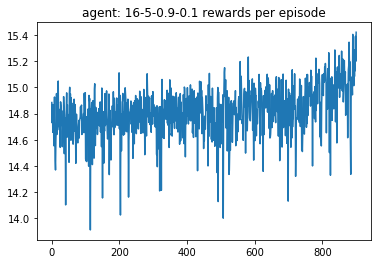

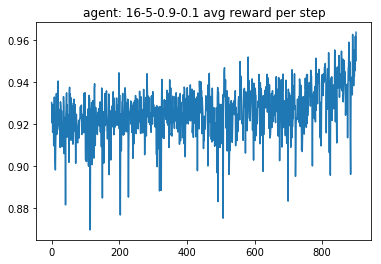

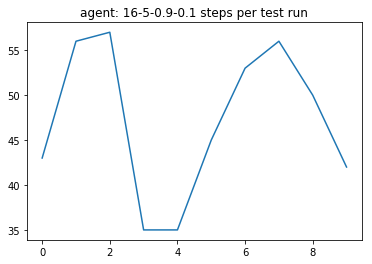

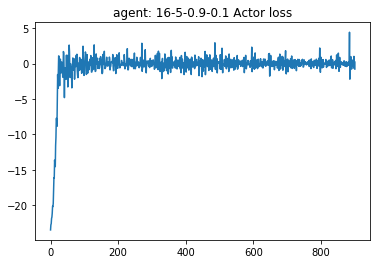

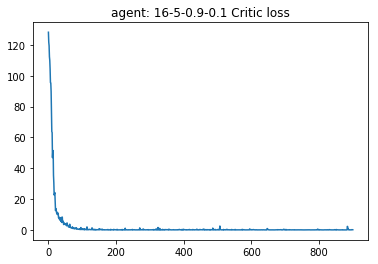

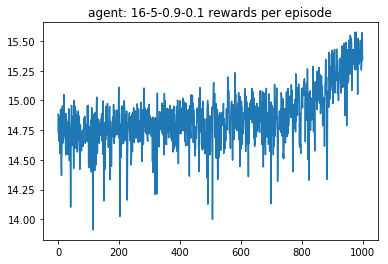

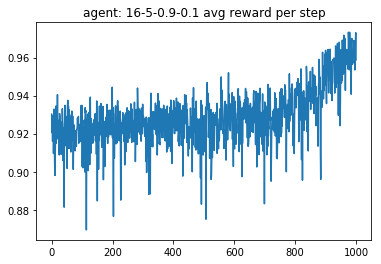

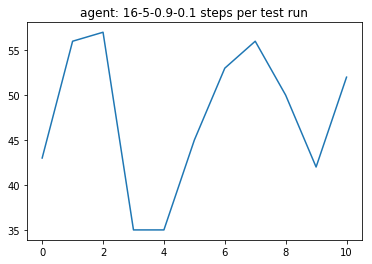

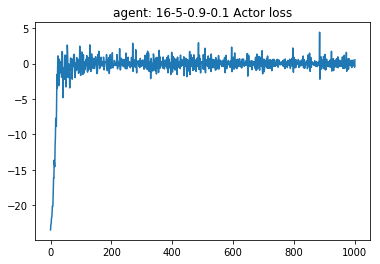

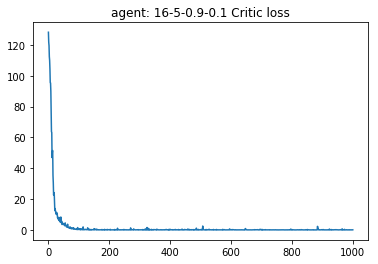

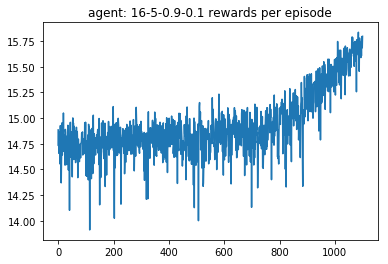

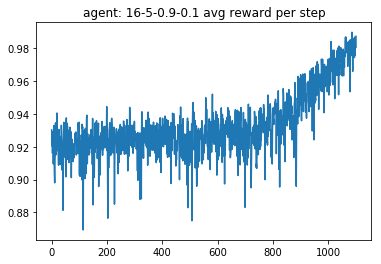

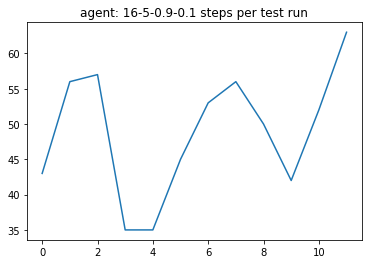

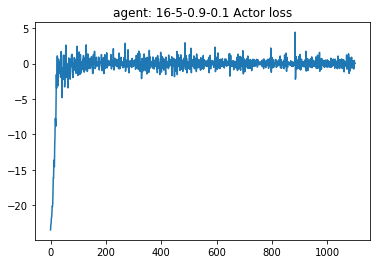

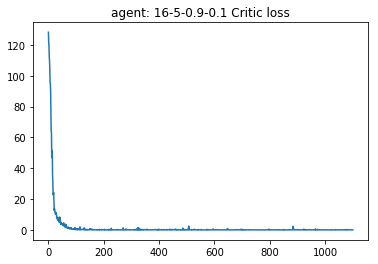

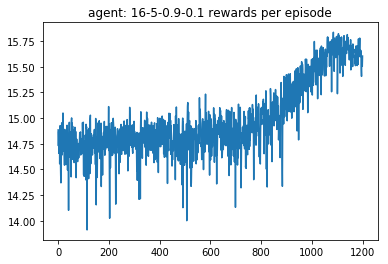

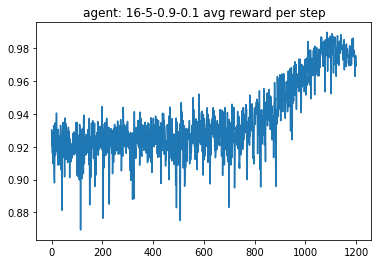

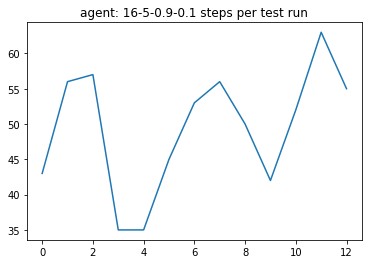

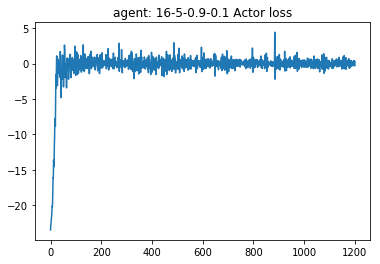

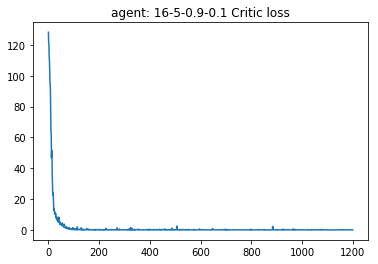

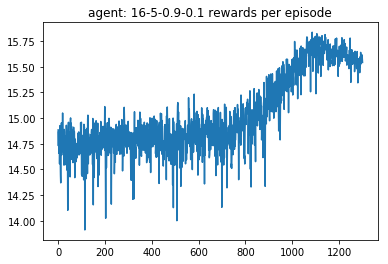

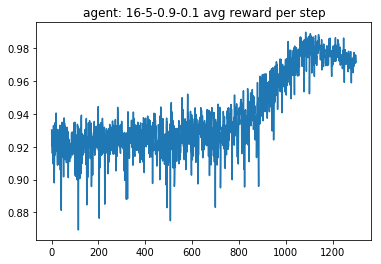

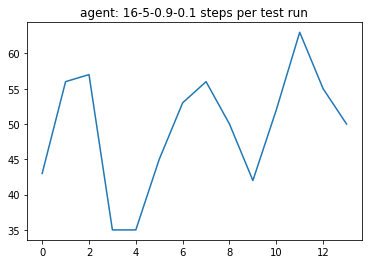

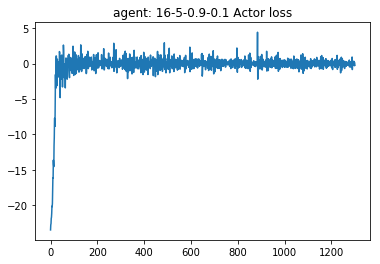

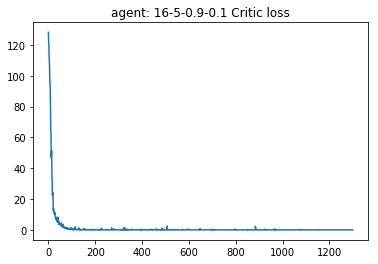

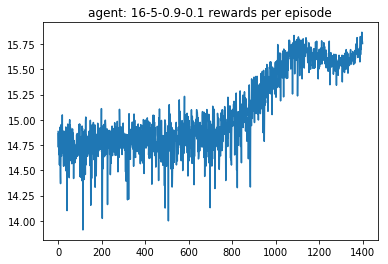

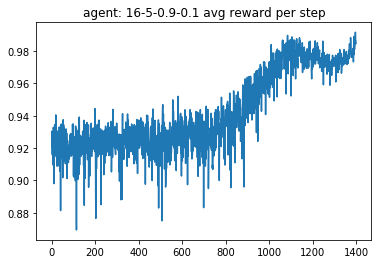

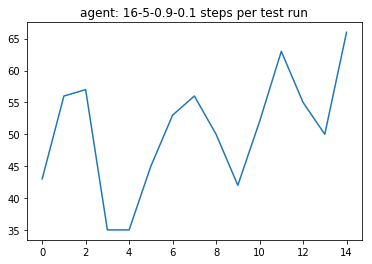

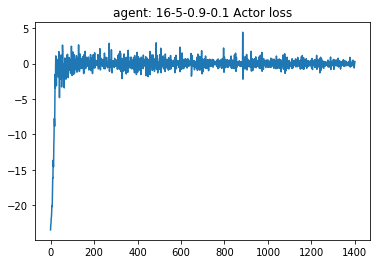

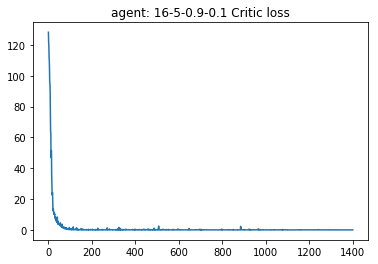

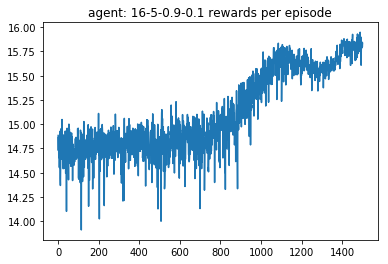

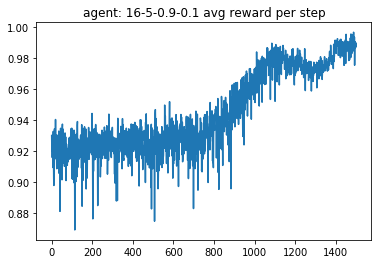

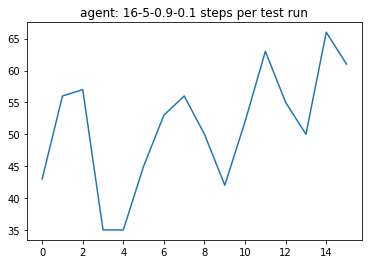

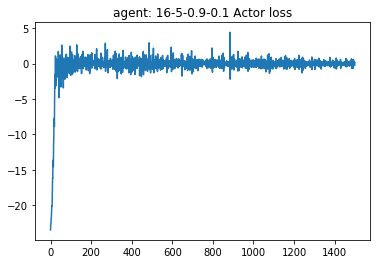

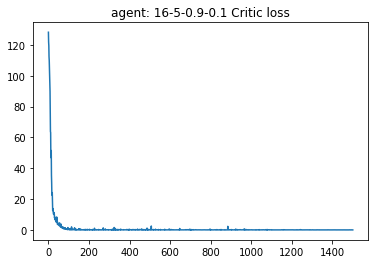

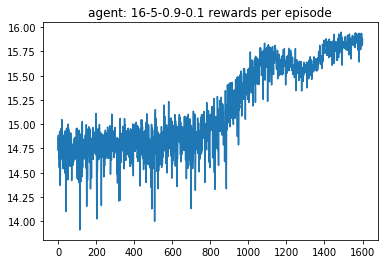

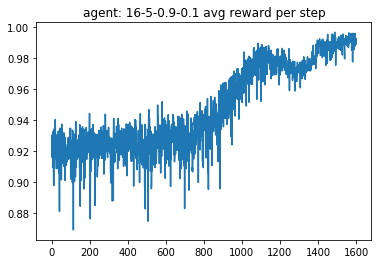

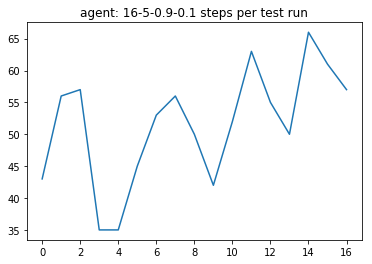

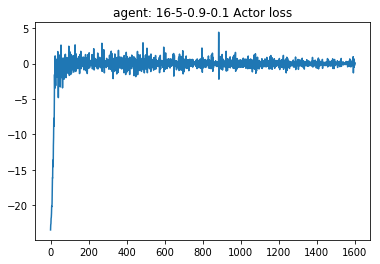

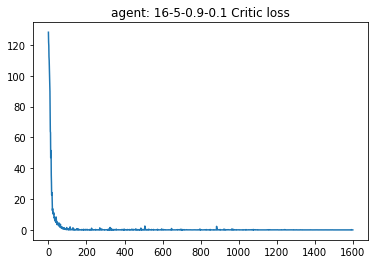

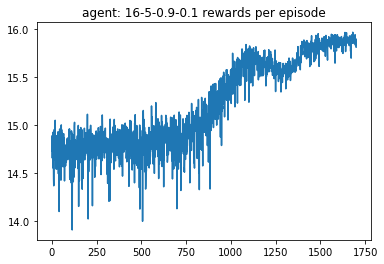

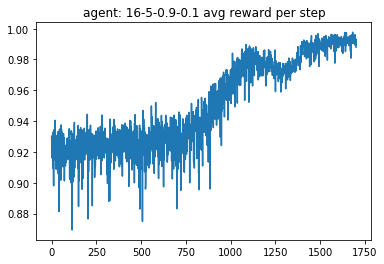

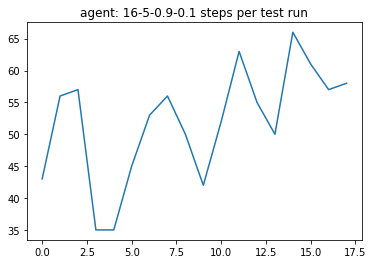

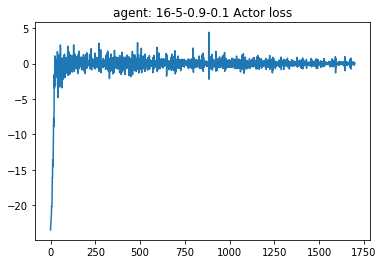

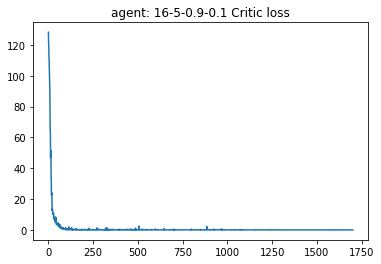

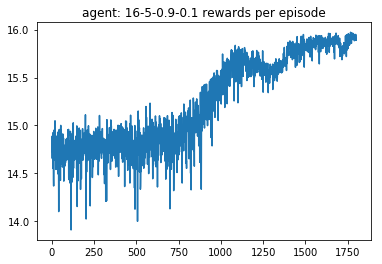

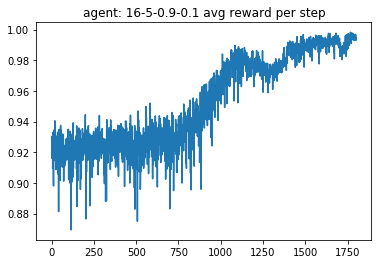

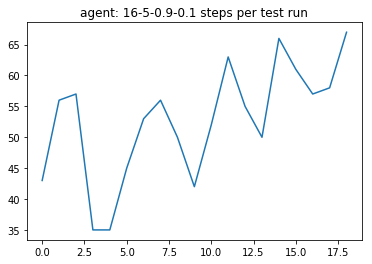

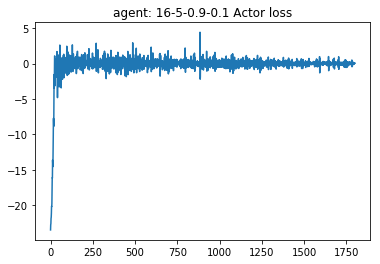

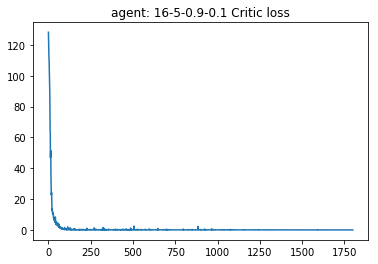

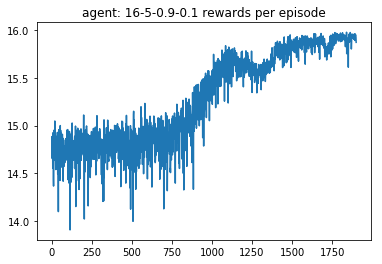

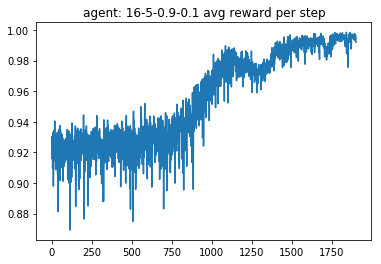

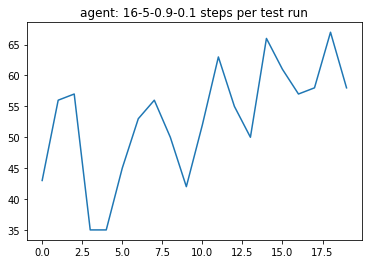

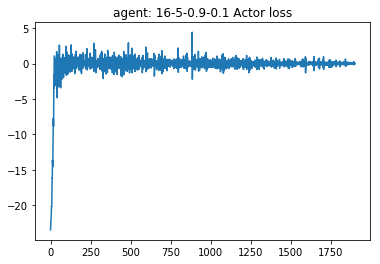

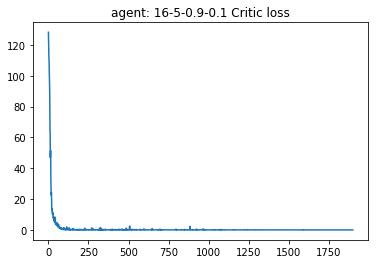

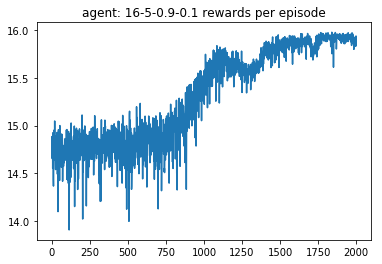

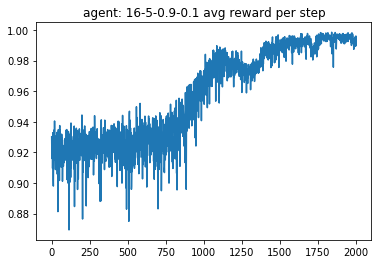

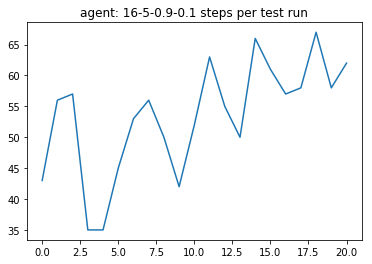

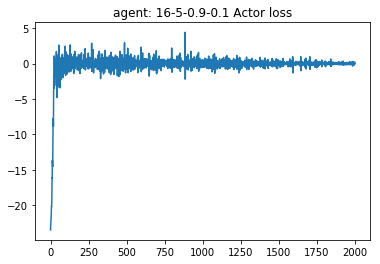

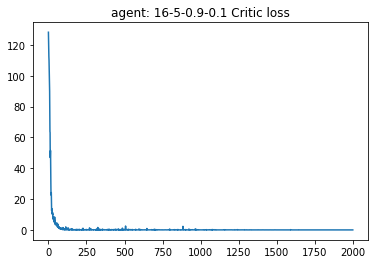

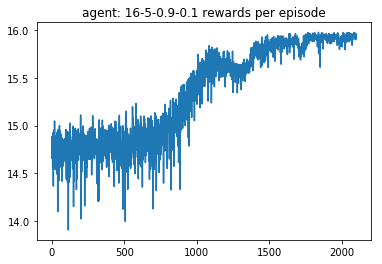

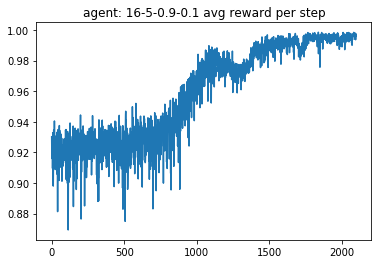

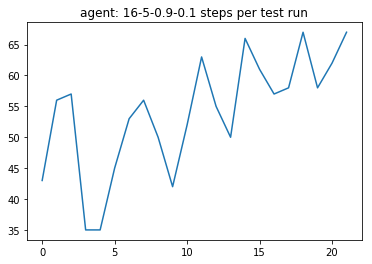

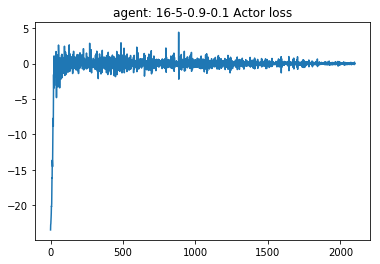

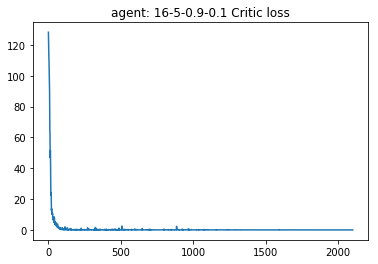

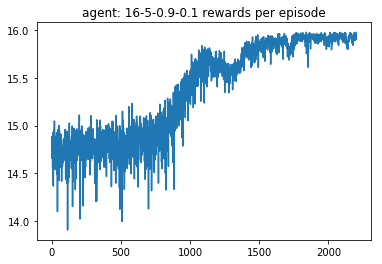

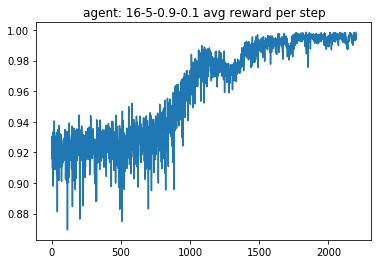

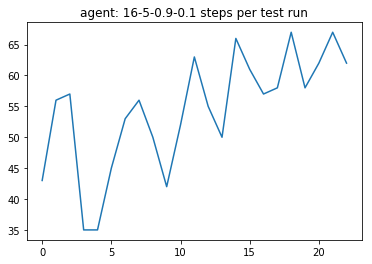

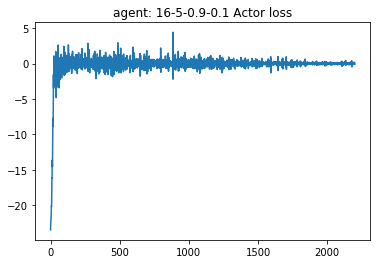

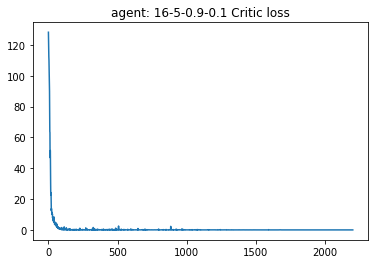

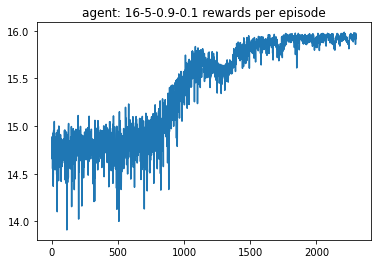

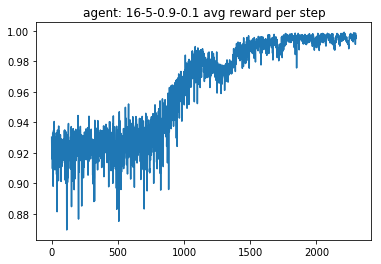

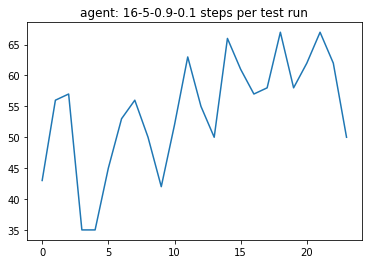

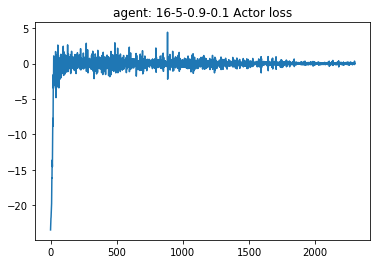

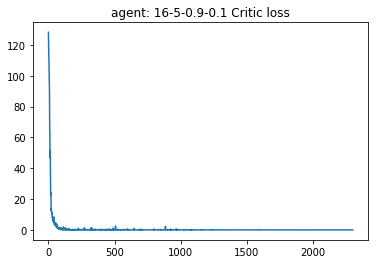

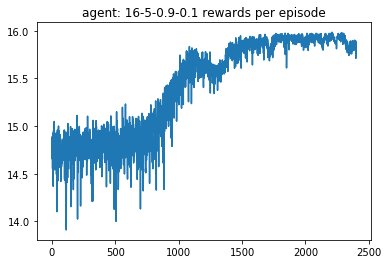

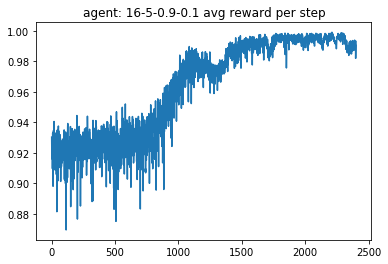

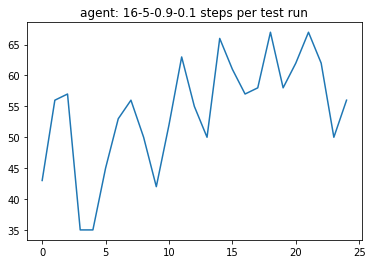

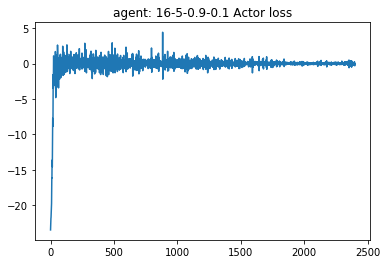

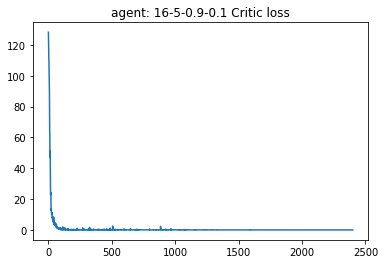

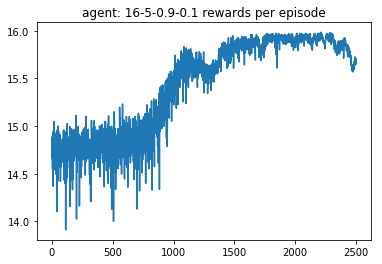

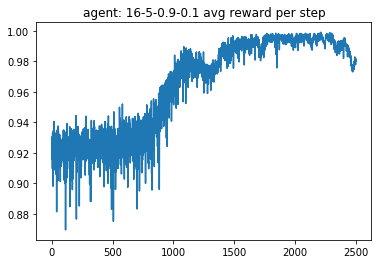

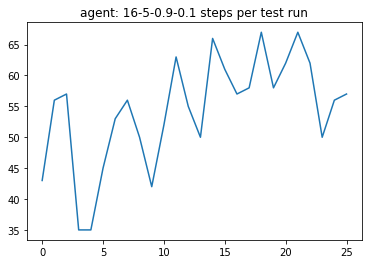

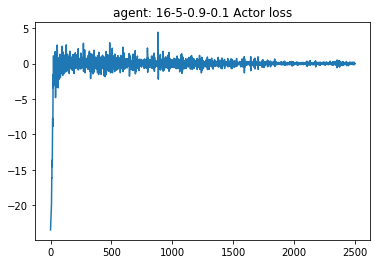

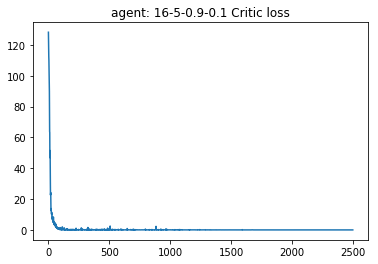

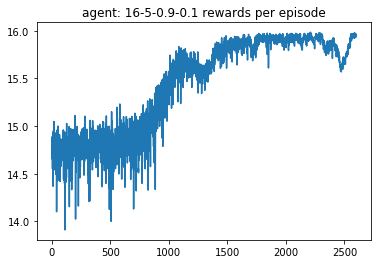

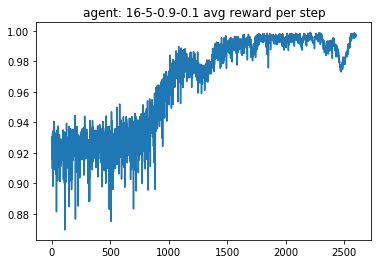

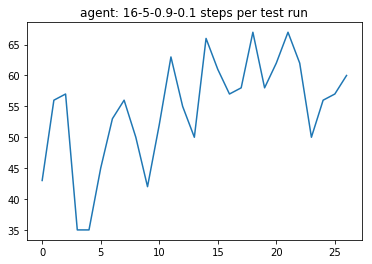

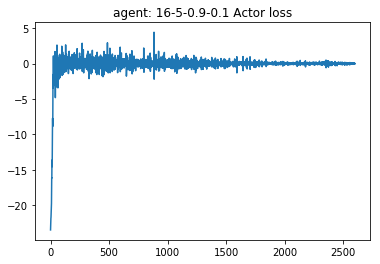

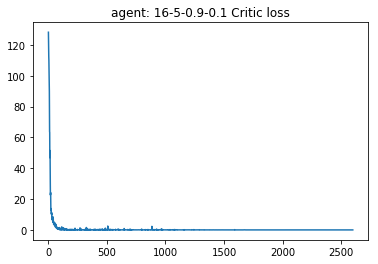

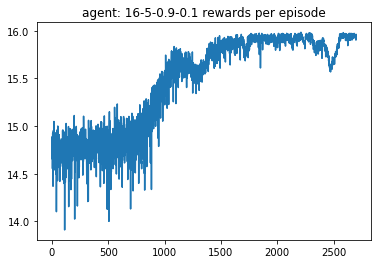

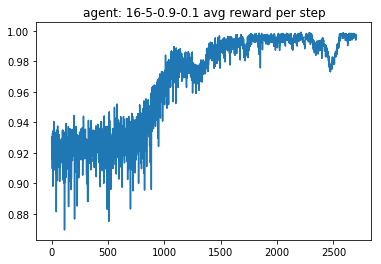

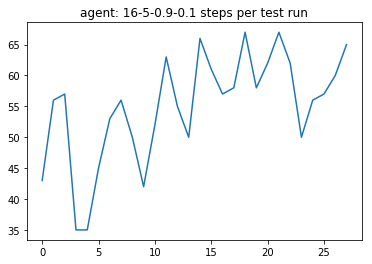

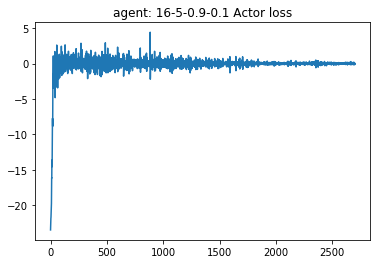

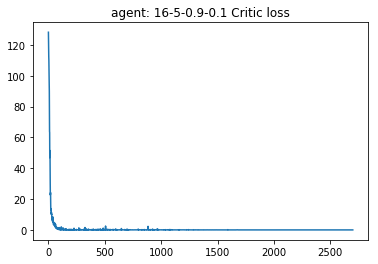

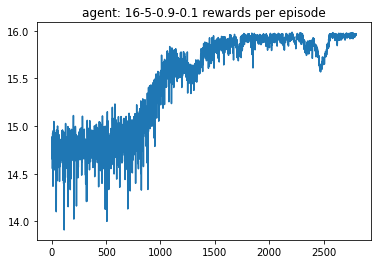

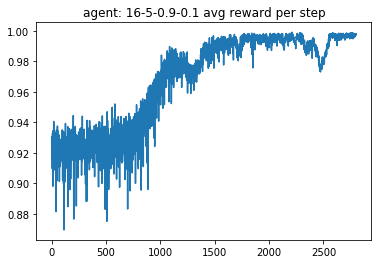

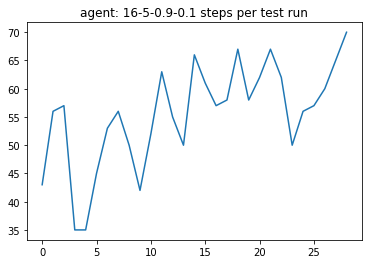

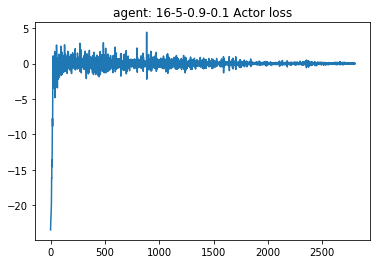

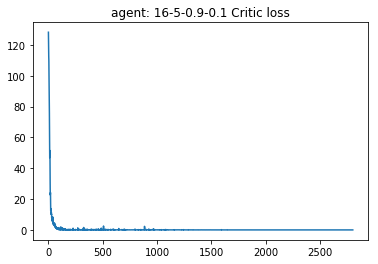

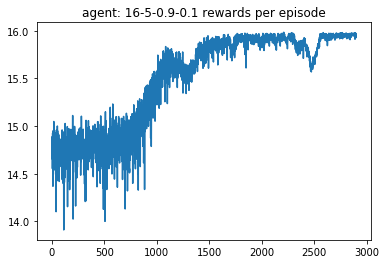

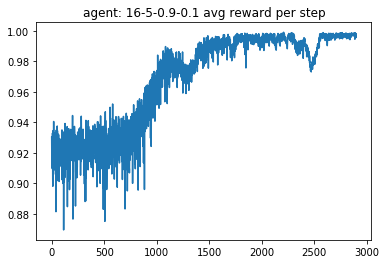

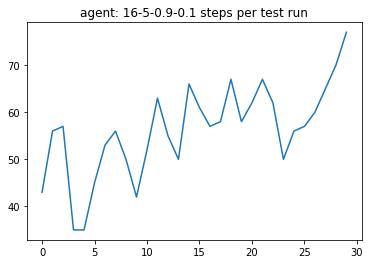

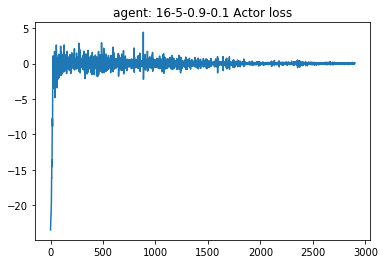

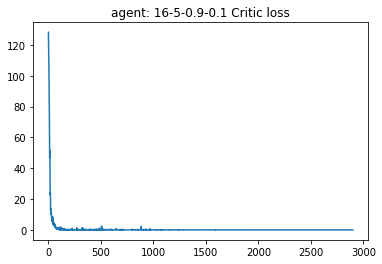

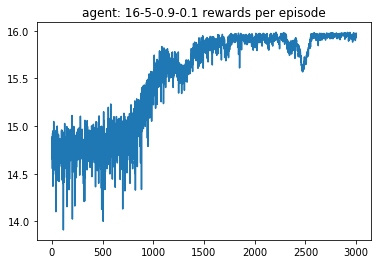

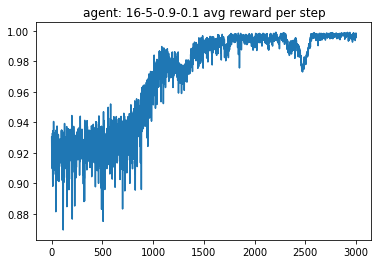

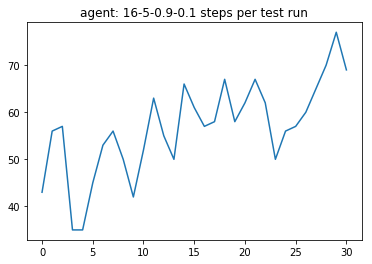

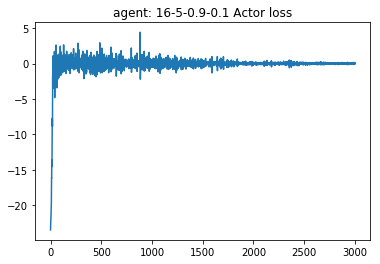

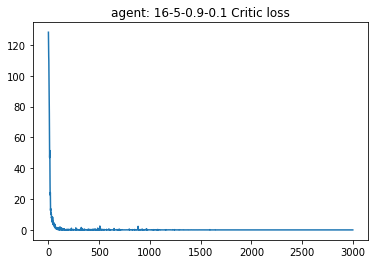

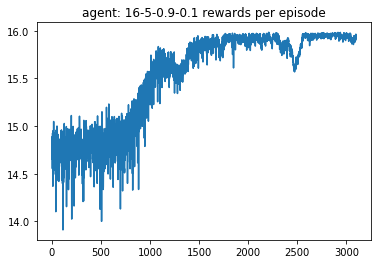

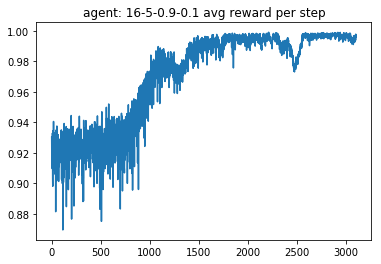

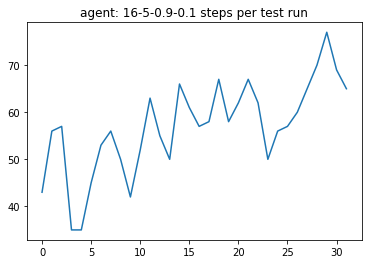

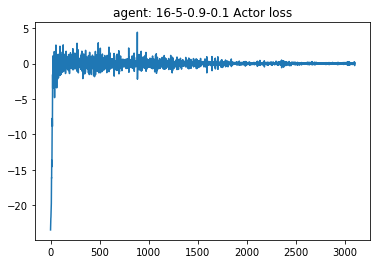

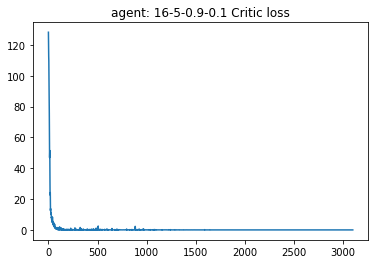

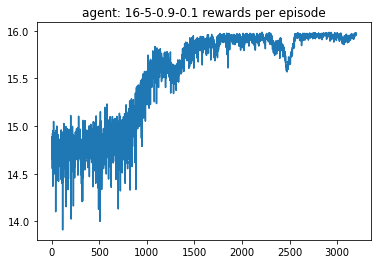

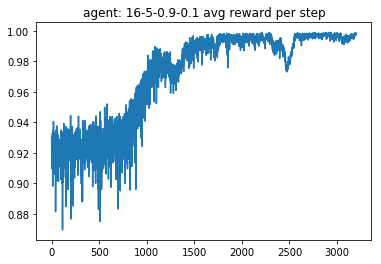

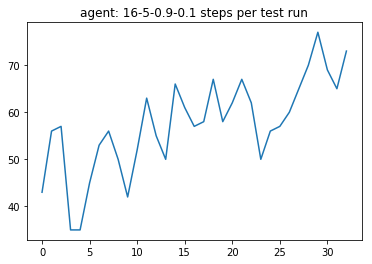

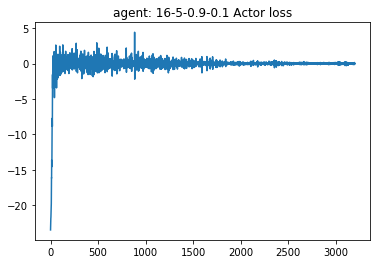

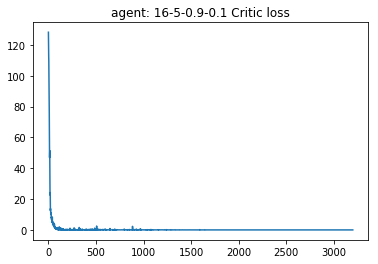

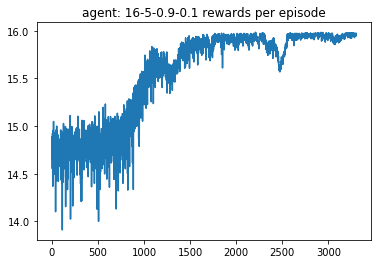

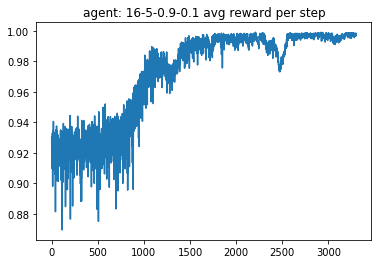

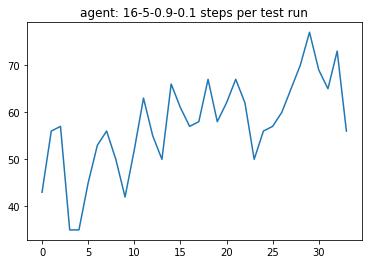

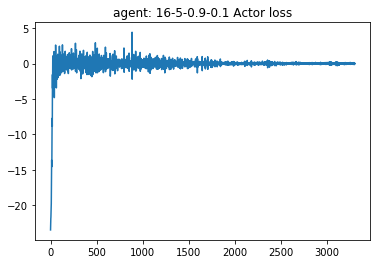

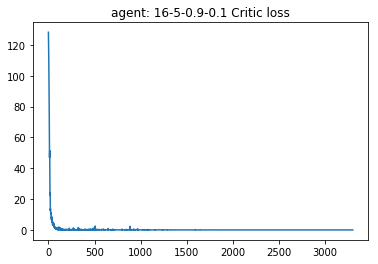

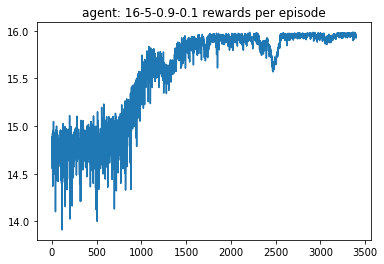

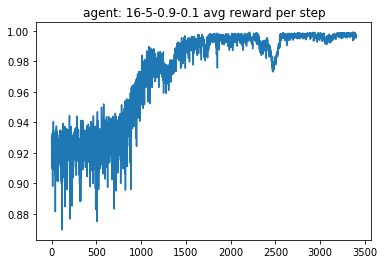

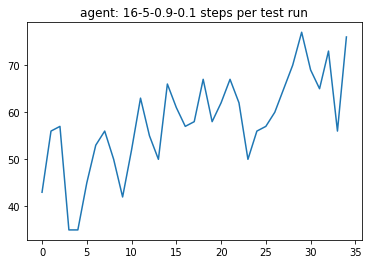

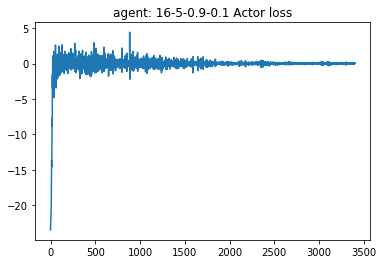

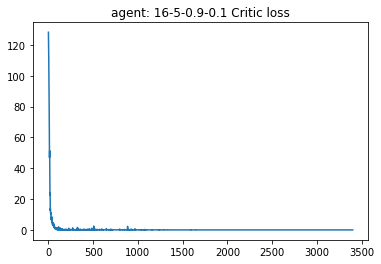

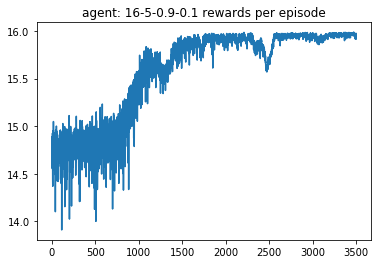

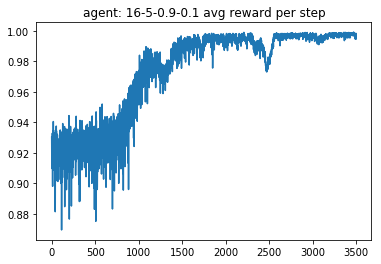

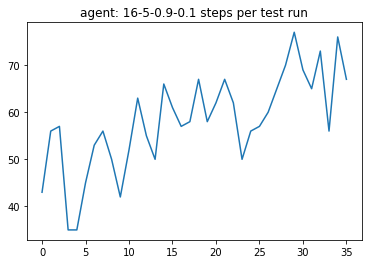

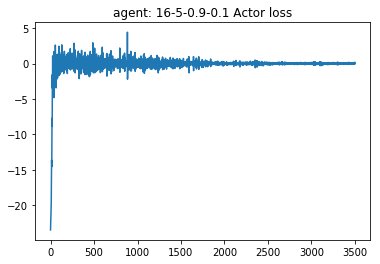

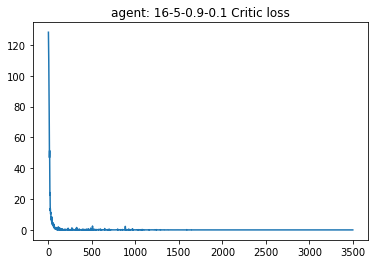

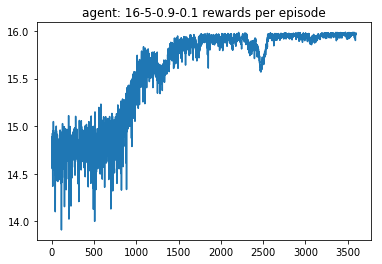

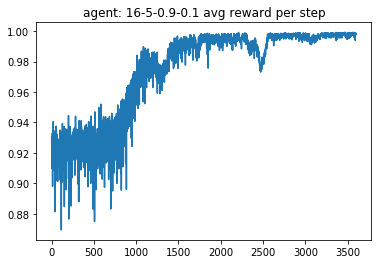

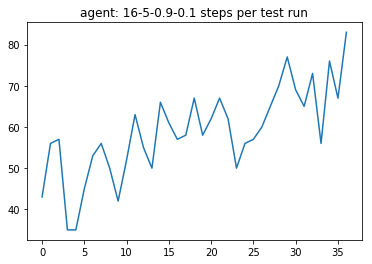

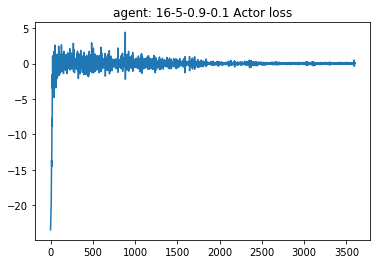

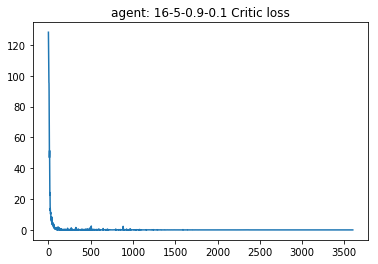

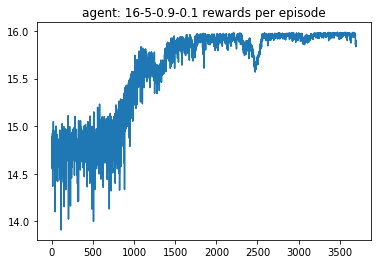

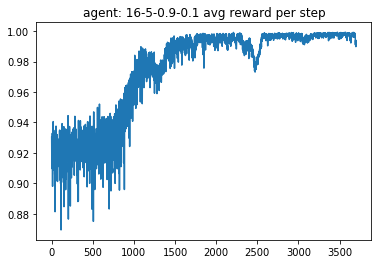

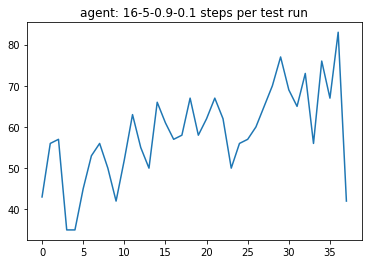

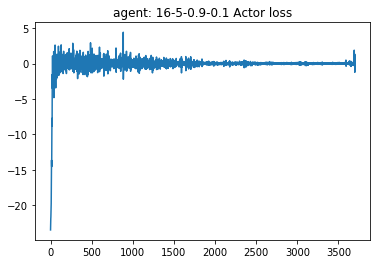

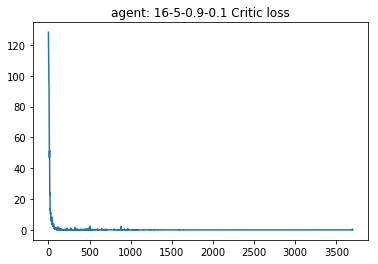

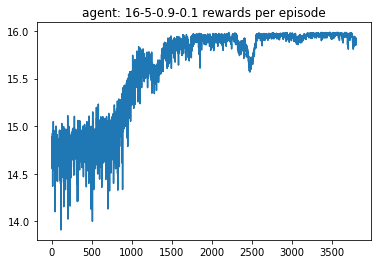

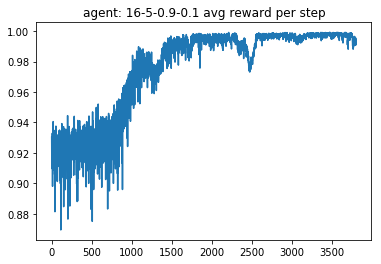

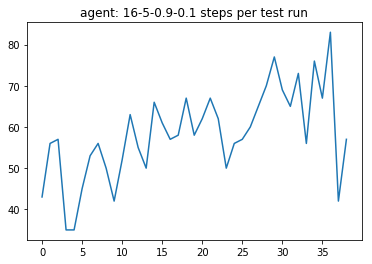

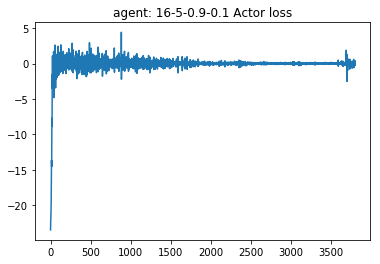

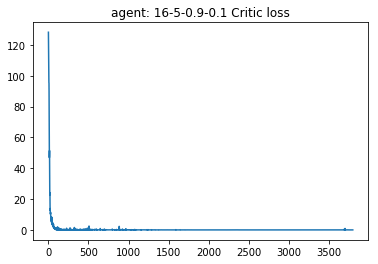

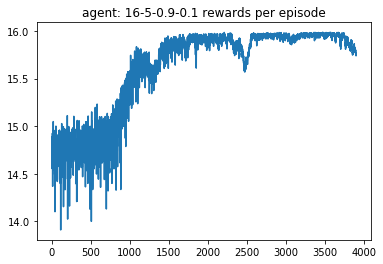

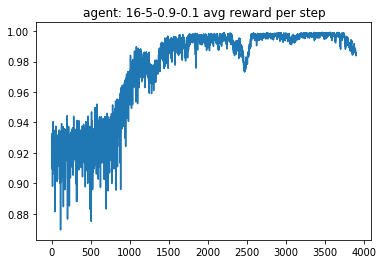

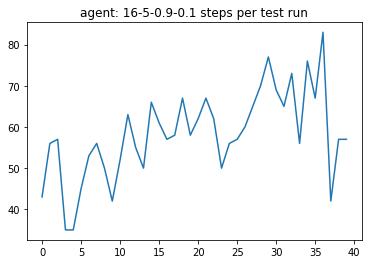

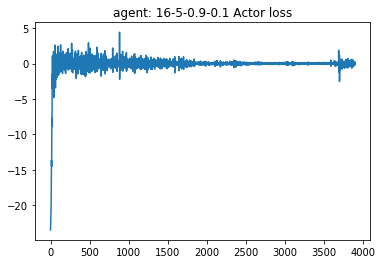

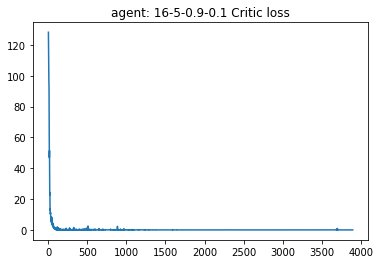

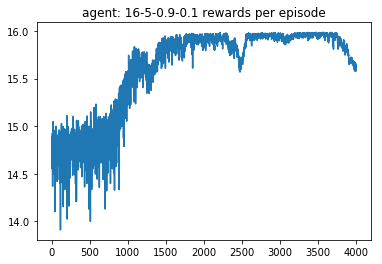

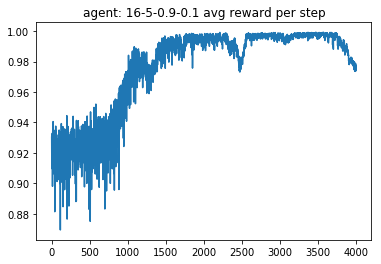

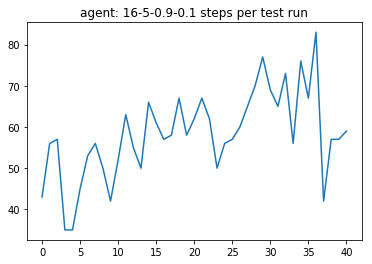

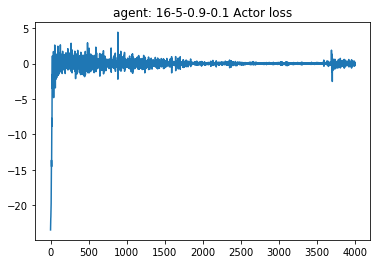

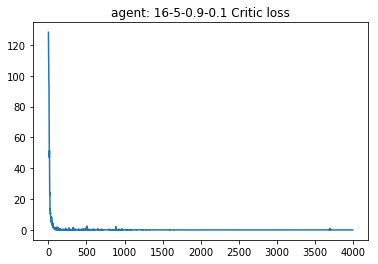

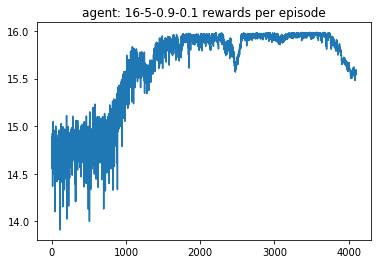

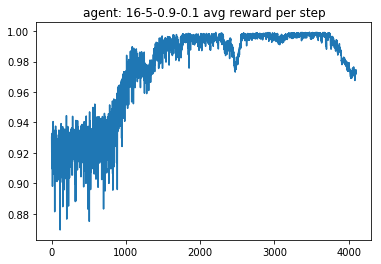

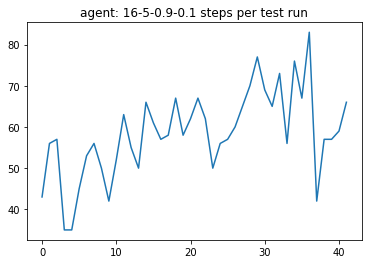

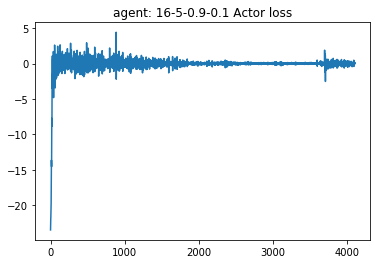

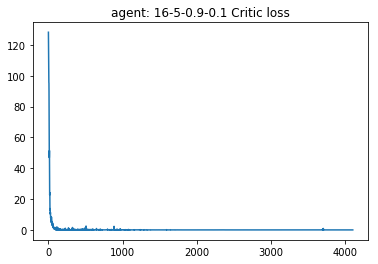

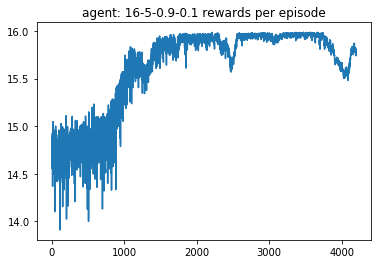

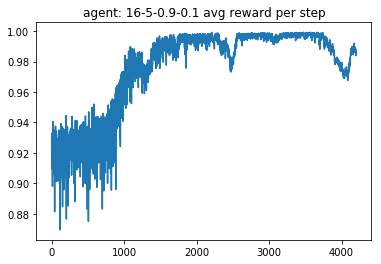

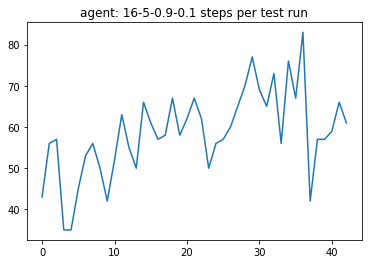

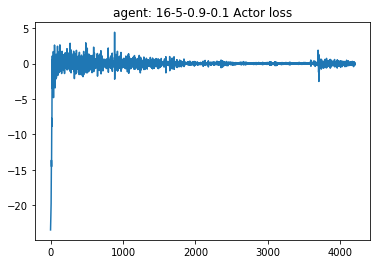

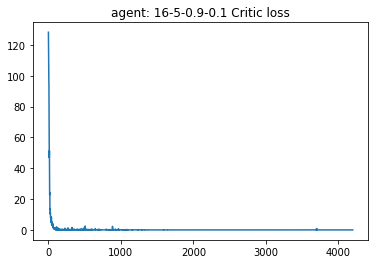

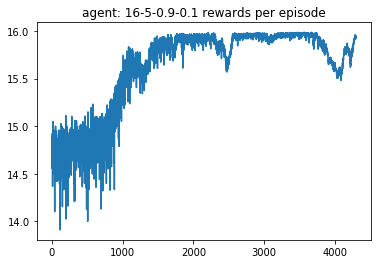

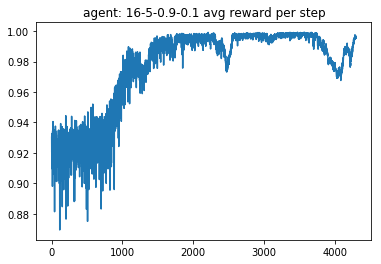

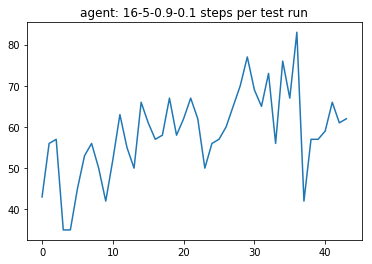

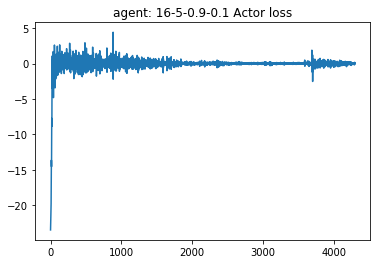

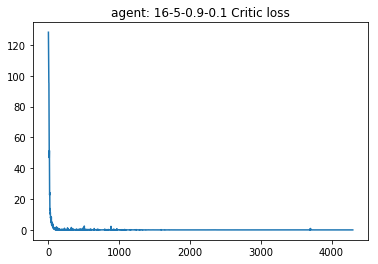

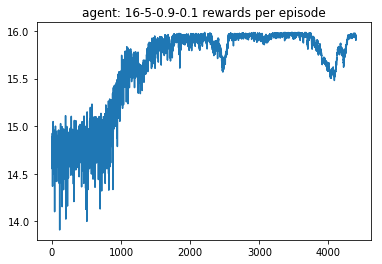

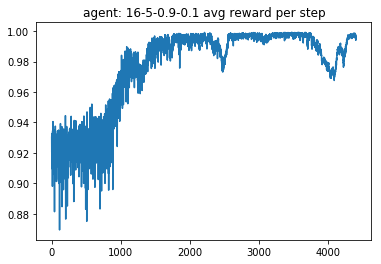

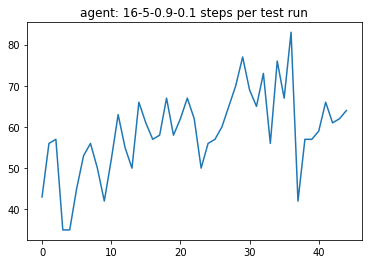

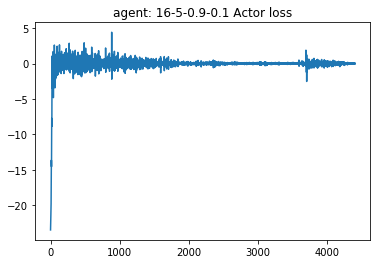

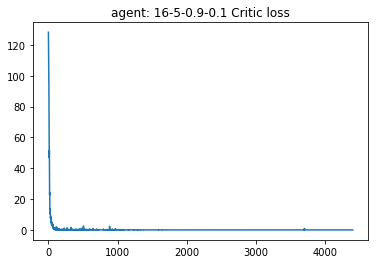

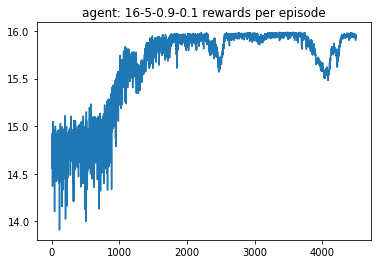

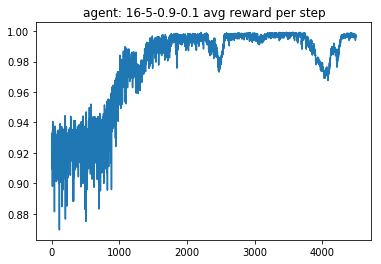

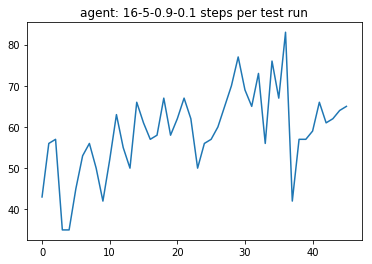

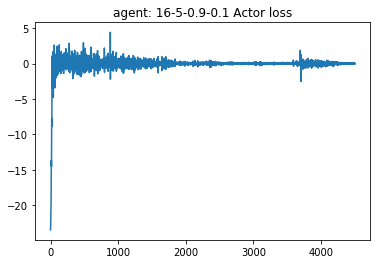

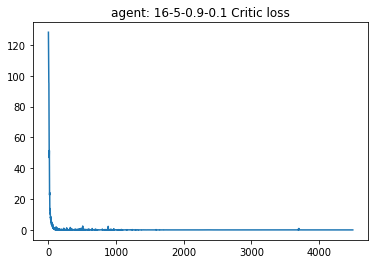

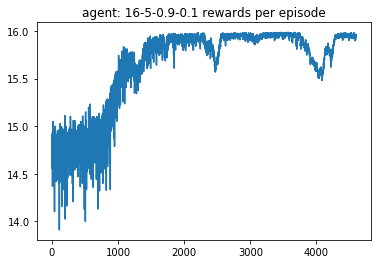

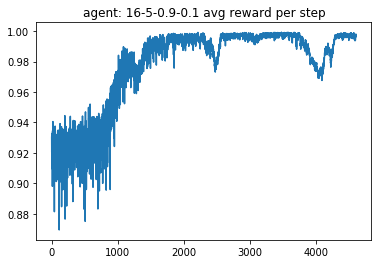

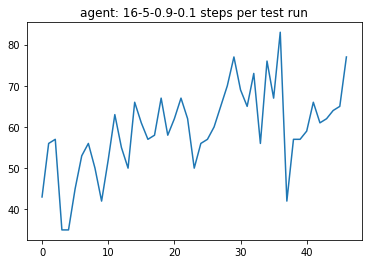

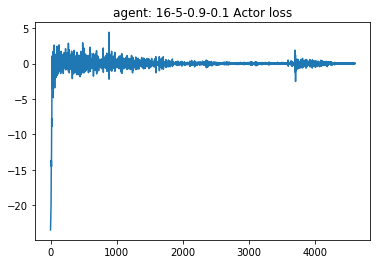

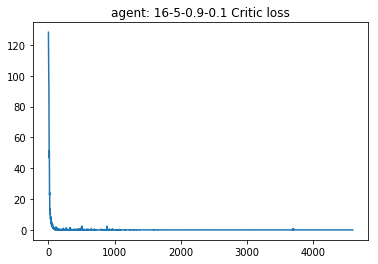

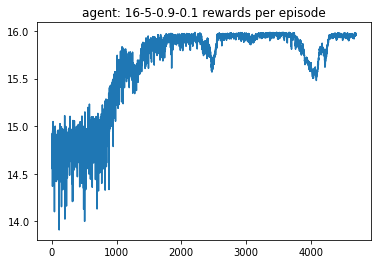

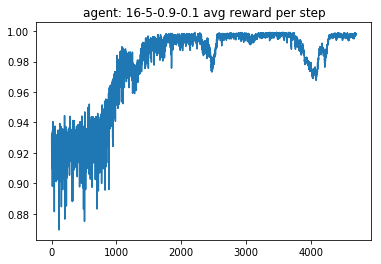

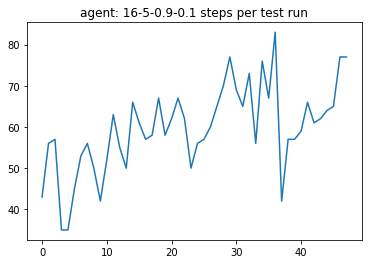

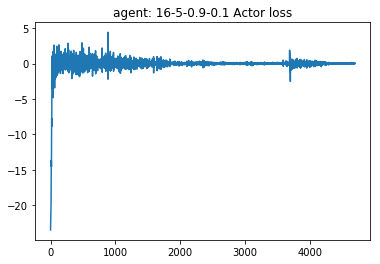

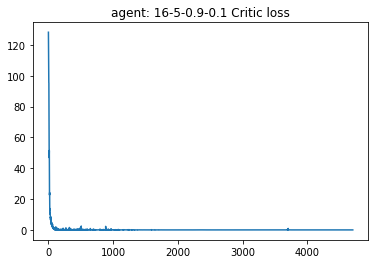

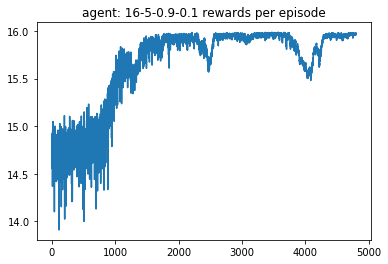

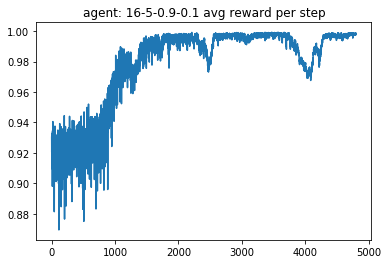

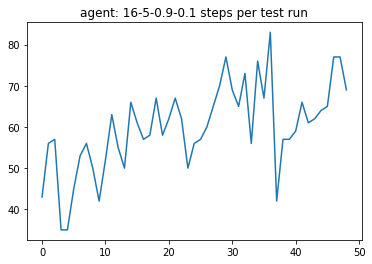

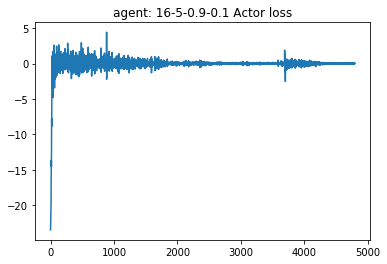

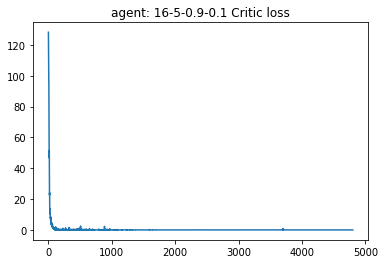

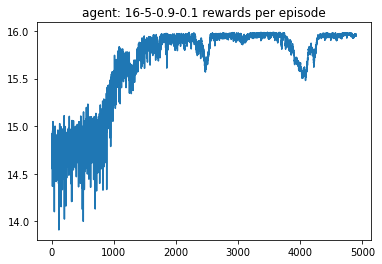

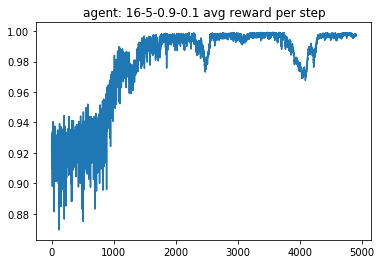

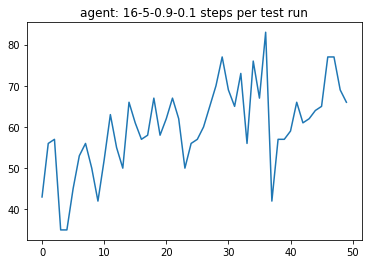

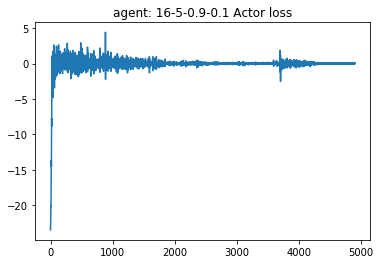

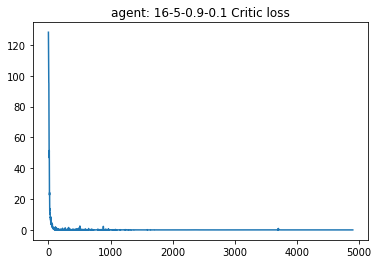

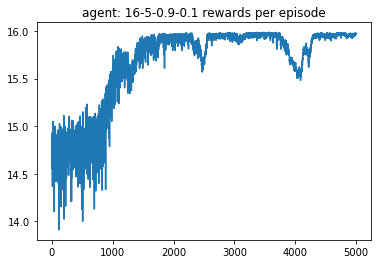

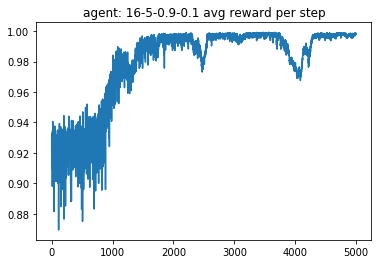

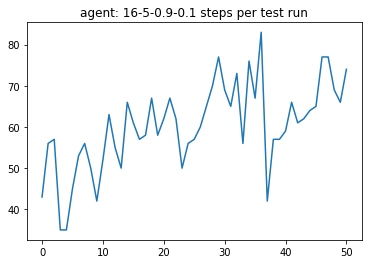

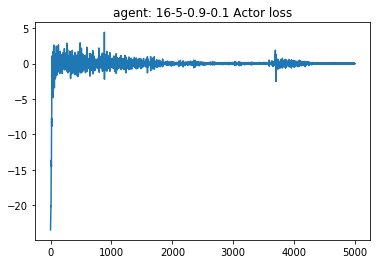

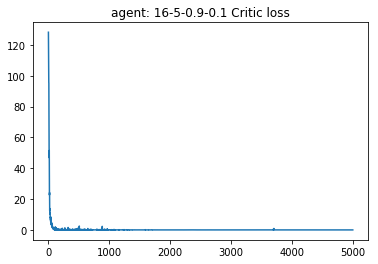

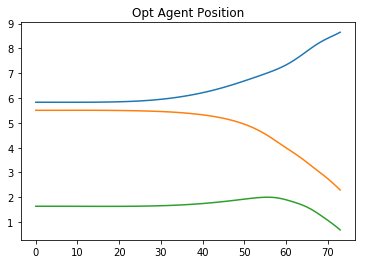

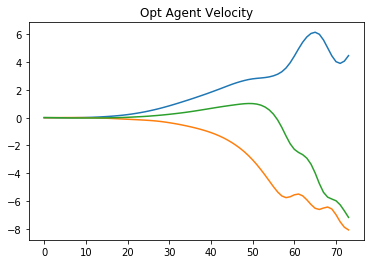

In [9]:
for scenario in scenarios:
    tf.reset_default_graph()
    env = Env()
    init_loc = env.init_loc
    target = env.target
    repeat = 1
    bias = 0.
    actionStdFactor = scenario[3]

    task = Task(init_pose = init_loc, init_velocities = [0., 0., 0.], runtime = 5.0, action_repeat = repeat,
            init_angle_velocities = [0., 0., 0.], target_pos = target, v_d = 2., bias=bias)
    agent = Agent(scenario[0], env, task, c_lr = 0.0005, a_lr = 0.0001, action_size = 4, action_repeat = repeat, 
              state_size = 34, N = 32, K = scenario[1], T = 20, bias = 0., gamma=scenario[2], varFactor = actionStdFactor)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(5000):
            if i % 100 == 0:
                show = False
            else:
                show = False
            agent.get_trajs(sess, add_meteor = False, metV=[10.])
            agent.optimize(sess, show = False)
            if i % 100 == 0:
                agent.play_game(sess, add_meteor = False, metV=[10.], show=True)
        agent.play_game(sess, add_meteor = False, metV=[10.], show=True, Final = True)